<h1>Greetings</h1>

This IPython file showcases our approach to the Republic Day Hackathon organised by TEG Analytics and Analytics India Magazine. The task was to “Predict Market Competitiveness For Insurance Products”.<br>
The IPython file has been divided into the following categories:<br>
1. Preprocessing: This is where we spent the majority of our time by cleaning, imputing data and feature generation.<br><br>
2. Modeling: We have used several different models for our prediction.They include:
<ul>
    <li>XGBoost Regressor</li>
    <li>StackNet Regressor</li>
    <li>Random Forest Regressor</li>
</ul>
<br>
3. Submimission: Where we created our submission file.

This is one of the part of the series of notebooks that we have used to create our final prediction. In this notebook we have cleaned the new data, created new features out of the key columns that are the same in both the train and test dataset. The key columns are 'County' , 'key_Segment1' and 'State'.

<h4>Importing the Libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

Importing the dataset below

In [2]:
df5=pd.read_csv('C:/Users/samde/Desktop/Data Science/Datasets/Medicare Hackathon/Landscape/Plandata_jan18.csv',sep = ',',encoding='mac_roman')
df2=pd.read_csv('C:/Users/samde/Desktop/Data Science/Datasets/Medicare Hackathon/TestData/Landscape_Test.csv',sep = ',',encoding='mac_roman')

C:\Users\samde\Miniconda3\envs\AI\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,26,27,29,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\samde\Miniconda3\envs\AI\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (22,24,25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Extra data which was given later on in the competition.

In [3]:
extra=pd.read_csv('C:/Users/samde/Desktop/Data Science/Datasets/Medicare Hackathon/Crosswalk/landscape2018_enrollments_jan17.csv',sep = ',',encoding='mac_roman')

In [4]:
extra1=pd.read_csv('C:/Users/samde/Desktop/Data Science/Datasets/Medicare Hackathon/Crosswalk/landscape2019_enrollments_jan18.csv',sep = ',',encoding='mac_roman')

<h1>Preprocessing</h1>

Creating the new data by merging.

In [5]:
df5['bid_id']=df5['key_Segment1']

In [6]:
df5['Previous_Year']=extra['Enrollment_jan_17']
df2=pd.merge(df2,extra1, on=['County','statecode',"bid_id"],how="left")

In [7]:
df2['Previous_Year']=df2["Enrollment_jan_18"]

In [8]:
df2.drop("Enrollment_jan_18",axis=1,inplace=True)

In [9]:
df=df5

In [10]:
#df["state_county"]=df["State"].astype(str) + "_" + df["County"].astype(str)
#df2["state_county"]=df["State"].astype(str) + "_" + df["County"].astype(str)

In [11]:
train_key=pd.DataFrame()
test_key=pd.DataFrame()

In [12]:
train_key['County']=df['County']
train_key['State']=df['State']
train_key['key_Segment1']=df['key_Segment1']

In [13]:
test_key['County']=df2['County']
test_key['State']=df2['State']
test_key['key_Segment1']=df2['key_Segment1']

In [14]:
same_key=pd.merge(train_key,test_key, on=['County','State','key_Segment1'], how='inner')

In [15]:
#test_key[test_key["key_Segment1"]=='H0028-004-000']

In [16]:
#train_key[train_key["key_Segment1"]=='H0028-004-000']

In [17]:
df2=pd.merge(same_key,df2,how='left',on=['County','State','key_Segment1'])

In [18]:
df1=df.drop(["FIPS_State_County_Code","SSA_State_County_Code","statecode","Contract_ID","Plan_ID","segment_id","Parent_Organization","TotalEstimatedAnnualCost","SalesMarket","Drug_Benefit_Type_Detail","snp","National_PDP",'Crdiovsculr_Disordrs_Diabetes'],axis=1)
df3=df2.drop(["FIPS_State_County_Code","SSA_State_County_Code","statecode","Contract_ID","Plan_ID","segment_id","Parent_Organization","TotalEstimatedAnnualCost","SalesMarket","Drug_Benefit_Type_Detail","snp","National_PDP",'Crdiovsculr_Disordrs_Diabetes'],axis=1)

In [19]:
df1.drop(["Organization_Name"],axis=1,inplace=True)
df3.drop(["Organization_Name"],axis=1,inplace=True)

Data Cleaning and Imputing.

In [ ]:
df1["plan_type"].fillna("NA",inplace=True)
df3["plan_type"].fillna("NA",inplace=True)

In [21]:
#For train
plantype=[]
for i, row in df1.iterrows():
    if row["plan_type"] == 'NA':
        plantype.append(row["plan_type_p"])
    else:
        plantype.append(row["plan_type"])
#For test
plantype_2=[]
for i, row in df3.iterrows():
    if row["plan_type"] == 'NA':
        plantype_2.append(row["plan_type_p"])
    else:
        plantype_2.append(row["plan_type"])

In [22]:
df1["plantype"]=plantype
df3["plantype"]=plantype_2

In [23]:
df1.drop(["plan_type_p","plan_type"],axis=1,inplace=True)
df3.drop(["plan_type_p","plan_type"],axis=1,inplace=True)

In [24]:
df1["Monthly_Consolidated_Premium_C_D"].fillna("$0.00",inplace=True)
df3["Monthly_Consolidated_Premium_C_D"].fillna("$0.00",inplace=True)

In [25]:
df["PartD_Basic_Premium3"].fillna("$0.00",inplace=True)
df2["PartD_Basic_Premium3"].fillna("$0.00",inplace=True)

In [26]:
df["PartC_Premium2"].fillna("$0.00",inplace=True)
df2["PartC_Premium2"].fillna("$0.00",inplace=True)

In [27]:
df["PartD_Supplemental_Premium4"].fillna("$0.00",inplace=True)
df2["PartD_Supplemental_Premium4"].fillna("$0.00",inplace=True)

In [28]:
df["PartD_Total_Premium5"].fillna("$0.00",inplace=True)
df2["PartD_Total_Premium5"].fillna("$0.00",inplace=True)

In [29]:
df["PartD_Prm_oblgtn_Full_prm_assist"].fillna("$0.00",inplace=True)
df2["PartD_Prm_oblgtn_Full_prm_assist"].fillna("$0.00",inplace=True)

In [30]:
df["PartD_Prm_oblgtn_75_prm_assist"].fillna("$0.00",inplace=True)
df2["PartD_Prm_oblgtn_75_prm_assist"].fillna("$0.00",inplace=True)

In [31]:
df["PartD_Prm_oblgtn_50_prm_assist"].fillna("$0.00",inplace=True)
df2["PartD_Prm_oblgtn_50_prm_assist"].fillna("$0.00",inplace=True)

In [32]:
df["PartD_Prm_oblgtn_25_prm_assist"].fillna("$0.00",inplace=True)
df2["PartD_Prm_oblgtn_25_prm_assist"].fillna("$0.00",inplace=True)

In [33]:
df["PartD_Drug_Deductible"].fillna("$0.00",inplace=True)
df2["PartD_Drug_Deductible"].fillna("$0.00",inplace=True)

In [34]:
#For train
MonthlyConsolidatedPremiumCD=[]

for i, row in df1.iterrows():
    MonthlyConsolidatedPremiumCD.append(re.sub('[!@#$]', '', str(row["Monthly_Consolidated_Premium_C_D"])))

#For test
MonthlyConsolidatedPremiumCD_2=[]

for i, row in df3.iterrows():
    MonthlyConsolidatedPremiumCD_2.append(re.sub('[!@#$]', '', str(row["Monthly_Consolidated_Premium_C_D"])))

In [35]:
#For train
MonthlyConsolidatedPremiumCD_=[]
for i in range(0,len(MonthlyConsolidatedPremiumCD)):
    MonthlyConsolidatedPremiumCD_.append(float(MonthlyConsolidatedPremiumCD[i]))
#For test
MonthlyConsolidatedPremiumCD_3=[]
for i in range(0,len(MonthlyConsolidatedPremiumCD_2)):
    MonthlyConsolidatedPremiumCD_3.append(float(MonthlyConsolidatedPremiumCD_2[i]))

In [36]:
df1["monthlycd"]=MonthlyConsolidatedPremiumCD_
df3["monthlycd"]=MonthlyConsolidatedPremiumCD_3

In [37]:
df1.drop("Monthly_Consolidated_Premium_C_D",axis=1,inplace=True)
df3.drop("Monthly_Consolidated_Premium_C_D",axis=1,inplace=True)

In [38]:
#For train
PartDBasicPremium3=[]

for i, row in df.iterrows():
    PartDBasicPremium3.append(re.sub('[!@#$]', '', str(row["PartD_Basic_Premium3"])))
#For test
PartDBasicPremium3_2=[]

for i, row in df2.iterrows():
    PartDBasicPremium3_2.append(re.sub('[!@#$]', '', str(row["PartD_Basic_Premium3"])))

In [39]:
#For train
PartDBasicPremium3_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDBasicPremium3_.append(float(PartDBasicPremium3[i]))
#For test
PartDBasicPremium3_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDBasicPremium3_3.append(float(PartDBasicPremium3_2[i]))

In [40]:
df1["partdbasicpremium3"]=PartDBasicPremium3_
df3["partdbasicpremium3"]=PartDBasicPremium3_3

In [41]:
#For train
PartCPremium2=[]

for i, row in df.iterrows():
    PartCPremium2.append(re.sub('[!@#$]', '', row["PartC_Premium2"]))
#For test
PartCPremium2_2=[]

for i, row in df2.iterrows():
    PartCPremium2_2.append(re.sub('[!@#$]', '', row["PartC_Premium2"]))

In [42]:
#For train
PartCPremium2_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartCPremium2_.append(float(PartCPremium2[i]))
#For test
PartCPremium2_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartCPremium2_3.append(float(PartCPremium2_2[i]))

In [43]:
df1["partcpremium2"]=PartCPremium2_
df3["partcpremium2"]=PartCPremium2_3

In [44]:
#For train
PartDSupplementalPremium4=[]

for i, row in df.iterrows():
    PartDSupplementalPremium4.append(re.sub('[!@#$]', '', row["PartD_Supplemental_Premium4"]))
#For test
PartDSupplementalPremium4_2=[]

for i, row in df2.iterrows():
    PartDSupplementalPremium4_2.append(re.sub('[!@#$]', '', row["PartD_Supplemental_Premium4"]))

In [45]:
#For train
PartDSupplementalPremium4_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDSupplementalPremium4_.append(float(PartDSupplementalPremium4[i]))
#For test
PartDSupplementalPremium4_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDSupplementalPremium4_3.append(float(PartDSupplementalPremium4_2[i]))

In [46]:
df1["partdsupplementalpremium4"]=PartDSupplementalPremium4_
df3["partdsupplementalpremium4"]=PartDSupplementalPremium4_3

In [47]:
#For train
PartDPrmoblgtnFullprmassist=[]

for i, row in df.iterrows():
    PartDPrmoblgtnFullprmassist.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_Full_prm_assist"]))
#For test
PartDPrmoblgtnFullprmassist_2=[]

for i, row in df2.iterrows():
    PartDPrmoblgtnFullprmassist_2.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_Full_prm_assist"]))

In [48]:
#For train
PartDPrmoblgtnFullprmassist_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDPrmoblgtnFullprmassist_.append(float(PartDPrmoblgtnFullprmassist[i]))
#For test
PartDPrmoblgtnFullprmassist_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDPrmoblgtnFullprmassist_3.append(float(PartDPrmoblgtnFullprmassist_2[i]))

In [49]:
df1["partdfull"]=PartDPrmoblgtnFullprmassist_
df3["partdfull"]=PartDPrmoblgtnFullprmassist_3

In [50]:
#For train
PartDPrmoblgtn75prmassist=[]

for i, row in df.iterrows():
    PartDPrmoblgtn75prmassist.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_75_prm_assist"]))
#For test
PartDPrmoblgtn75prmassist_2=[]

for i, row in df2.iterrows():
    PartDPrmoblgtn75prmassist_2.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_75_prm_assist"]))

In [51]:
#For train
PartDPrmoblgtn75prmassist_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDPrmoblgtn75prmassist_.append(float(PartDPrmoblgtn75prmassist[i]))
#For test
PartDPrmoblgtn75prmassist_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDPrmoblgtn75prmassist_3.append(float(PartDPrmoblgtn75prmassist_2[i]))

In [52]:
df1["partd50"]=PartDPrmoblgtn75prmassist_
df3["partd50"]=PartDPrmoblgtn75prmassist_3

In [53]:
#For train
PartDPrmoblgtn50prmassist=[]

for i, row in df.iterrows():
    PartDPrmoblgtn50prmassist.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_50_prm_assist"]))
#For test
PartDPrmoblgtn50prmassist_2=[]

for i, row in df2.iterrows():
    PartDPrmoblgtn50prmassist_2.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_50_prm_assist"]))

In [54]:
#For train
PartDPrmoblgtn50prmassist_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDPrmoblgtn50prmassist_.append(float(PartDPrmoblgtn50prmassist[i]))
#For test
PartDPrmoblgtn50prmassist_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDPrmoblgtn50prmassist_3.append(float(PartDPrmoblgtn50prmassist_2[i]))

In [55]:
df1["partd50"]=PartDPrmoblgtn50prmassist_
df3["partd50"]=PartDPrmoblgtn50prmassist_3

In [56]:
#For train
PartDPrmoblgtn25prmassist=[]

for i, row in df.iterrows():
    PartDPrmoblgtn25prmassist.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_25_prm_assist"]))
#For test
PartDPrmoblgtn25prmassist_2=[]

for i, row in df2.iterrows():
    PartDPrmoblgtn25prmassist_2.append(re.sub('[!@#$]', '', row["PartD_Prm_oblgtn_25_prm_assist"]))

In [57]:
#For train
PartDPrmoblgtn25prmassist_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDPrmoblgtn25prmassist_.append(float(PartDPrmoblgtn25prmassist[i]))
#For test
PartDPrmoblgtn25prmassist_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDPrmoblgtn25prmassist_3.append(float(PartDPrmoblgtn25prmassist_2[i]))

In [58]:
df1["partd25"]=PartDPrmoblgtn25prmassist_
df3["partd25"]=PartDPrmoblgtn25prmassist_3

In [59]:
#For train
PartDTotalPremium5=[]

for i, row in df.iterrows():
    PartDTotalPremium5.append(re.sub('[!@#$]', '', row["PartD_Total_Premium5"]))
#For test
PartDTotalPremium5_2=[]

for i, row in df2.iterrows():
    PartDTotalPremium5_2.append(re.sub('[!@#$]', '', row["PartD_Total_Premium5"]))

In [60]:
#For train
PartDTotalPremium5_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDTotalPremium5_.append(float(PartDTotalPremium5[i]))
#For test
PartDTotalPremium5_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDTotalPremium5_3.append(float(PartDTotalPremium5_2[i]))

In [61]:
df1["partdtotal5"]=PartDTotalPremium5_
df3["partdtotal5"]=PartDTotalPremium5_3

In [62]:
#For train
PartDDrugDeductible=[]

for i, row in df.iterrows():
    PartDDrugDeductible.append(re.sub('[!@#$]', '', row["PartD_Drug_Deductible"]))
#For test
PartDDrugDeductible_2=[]

for i, row in df2.iterrows():
    PartDDrugDeductible_2.append(re.sub('[!@#$]', '', row["PartD_Drug_Deductible"]))

In [63]:
#For train
PartDDrugDeductible_=[]
for i in range(0,len(PartDBasicPremium3)):
    PartDDrugDeductible_.append(float(PartDDrugDeductible[i]))
#For test
PartDDrugDeductible_3=[]
for i in range(0,len(PartDBasicPremium3_2)):
    PartDDrugDeductible_3.append(float(PartDDrugDeductible_2[i]))

In [64]:
df1["partddrugdeuctible"]=PartDDrugDeductible_
df3["partddrugdeuctible"]=PartDDrugDeductible_3

In [65]:
df1.drop(["PartC_Premium2","PartD_Prm_oblgtn_25_prm_assist","PartD_Prm_oblgtn_50_prm_assist","PartD_Prm_oblgtn_75_prm_assist","PartD_Prm_oblgtn_Full_prm_assist","PartD_Supplemental_Premium4",],axis=1,inplace=True)
df3.drop(["PartC_Premium2","PartD_Prm_oblgtn_25_prm_assist","PartD_Prm_oblgtn_50_prm_assist","PartD_Prm_oblgtn_75_prm_assist","PartD_Prm_oblgtn_Full_prm_assist","PartD_Supplemental_Premium4",],axis=1,inplace=True)

In [66]:
df1.drop(["PartD_Total_Premium5","PartD_Basic_Premium3","PartD_Drug_Deductible"],axis=1,inplace=True)
df3.drop(["PartD_Total_Premium5","PartD_Basic_Premium3","PartD_Drug_Deductible"],axis=1,inplace=True)

In [67]:
df1.drop(["Annual_Drug_Deductible","star_rating"],axis=1,inplace=True)
df3.drop(["Annual_Drug_Deductible","star_rating"],axis=1,inplace=True)

In [68]:
df1["Drug_Benefit_TypeNA"]=df["Drug_Benefit_Type"].isna()
df3["Drug_Benefit_TypeNA"]=df2["Drug_Benefit_Type"].isna()

In [69]:
df1["Drug_Benefit_Type"].fillna("NA",inplace=True)
df3["Drug_Benefit_Type"].fillna("NA",inplace=True)

In [70]:
df1["PartD"].fillna("Yes",inplace=True)
df3["PartD"].fillna("Yes",inplace=True)

In [71]:
df1["enrollments_jan18"].fillna(int(0),inplace=True)
df3['Previous_Year'].fillna(int(0),inplace=True)

In [72]:
df["Special_Needs_Plan_TypeNA"]=df["Special_Needs_Plan_Type"].isna()
df2["Special_Needs_Plan_TypeNA"]=df2["Special_Needs_Plan_Type"].isna()

In [73]:
df1['PartDDrugDeductibleNA']=df['PartD_Drug_Deductible'].isna()
df3['PartDDrugDeductibleNA']=df2['PartD_Drug_Deductible'].isna()

In [74]:
df1["Special_Needs_Plan_Type"].fillna("NA",inplace=True)
df3["Special_Needs_Plan_Type"].fillna("NA",inplace=True)

In [75]:
df1["Cardiovascular_Disorders"].fillna(int(0),inplace=True)
df3["Cardiovascular_Disorders"].fillna(int(0),inplace=True)

In [76]:
df1["Dementia"].fillna(int(0),inplace=True)
df3["Dementia"].fillna(int(0),inplace=True)

In [77]:
df1["Diabetes_Mellitus"].fillna(int(0),inplace=True)
df3["Diabetes_Mellitus"].fillna(int(0),inplace=True)

In [78]:
df1["HIV_AIDS"].fillna(int(0),inplace=True)
df3["HIV_AIDS"].fillna(int(0),inplace=True)

In [79]:
df1["Chronic_Lung_Disorders"].fillna(int(0),inplace=True)
df3["Chronic_Lung_Disorders"].fillna(int(0),inplace=True)

In [80]:
df1["Chrnic_Mental_hlth_Cdtn"].fillna(int(0),inplace=True)
df3["Chrnic_Mental_hlth_Cdtn"].fillna(int(0),inplace=True)

In [81]:
df1["Crdiovsculr_Disordrs_hrt_fail"].fillna(int(0),inplace=True)
df3["Crdiovsculr_Disordrs_hrt_fail"].fillna(int(0),inplace=True)

In [82]:
df1["Cardio_Disordrs_hrtfail_diabetes"].fillna(int(0),inplace=True)
df3["Cardio_Disordrs_hrtfail_diabetes"].fillna(int(0),inplace=True)

In [83]:
df1["End_stge_Renal_Disease_dialysis"].fillna(int(0),inplace=True)
df3["End_stge_Renal_Disease_dialysis"].fillna(int(0),inplace=True)

In [84]:
df1["Chronic_Heart_Failure"].fillna(int(0),inplace=True)
df3["Chronic_Heart_Failure"].fillna(int(0),inplace=True)

In [85]:
df1["Chronic_Heart_Fail_Diabetes"].fillna(int(0),inplace=True)
df3["Chronic_Heart_Fail_Diabetes"].fillna(int(0),inplace=True)

In [86]:
df1["Add_Cvrg_Offrd_in_GapNA"]=df1["Add_Cvrg_Offrd_in_Gap"].isna()
df3["Add_Cvrg_Offrd_in_GapNA"]=df2["Add_Cvrg_Offrd_in_Gap"].isna()

In [87]:
df1["Add_Cvrg_Offrd_in_Gap"].fillna("NA",inplace=True)
df3["Add_Cvrg_Offrd_in_Gap"].fillna("NA",inplace=True)

In [88]:
df1.drop("Extra_Coverage_in_Gap",axis=1,inplace=True)
df3.drop("Extra_Coverage_in_Gap",axis=1,inplace=True)

In [89]:
df1.drop("Organization_Type",axis=1,inplace=True)
df3.drop("Organization_Type",axis=1,inplace=True)

In [90]:
df1["MMP"].fillna("No",inplace=True)
df3["MMP"].fillna("No",inplace=True)

In [91]:
df1["Special_Needs_PlanNA"]=df1["Special_Needs_Plan"].isna()
df3["Special_Needs_PlanNA"]=df3["Special_Needs_Plan"].isna()

In [92]:
df1["Special_Needs_Plan"].fillna("NA",inplace=True)
df3["Special_Needs_Plan"].fillna("NA",inplace=True)

In [93]:
df1.drop("Benefit_Type",axis=1,inplace=True)
df3.drop("Benefit_Type",axis=1,inplace=True)

In [94]:
df1["PartD_Basic_Prm_Blw_Rgnl_bnchmrk"].fillna("Above",inplace=True)
df3["PartD_Basic_Prm_Blw_Rgnl_bnchmrk"].fillna("Above",inplace=True)

In [95]:
df1["Tiers_Not_Subject_to_Deductible7"].fillna(float(0.00),inplace=True)
df3["Tiers_Not_Subject_to_Deductible7"].fillna(float(0.00),inplace=True)

In [96]:
df1["Increased_Initial_Coverage_Limit"].fillna("N",inplace=True)
df3["Increased_Initial_Coverage_Limit"].fillna("N",inplace=True)

In [97]:
df1["In_network_MOOP_AmountNA"]=df1["In_network_MOOP_Amount"].isna()
df3["In_network_MOOP_AmountNA"]=df3["In_network_MOOP_Amount"].isna()

In [98]:
df1['In_network_MOOP_Amount'].fillna("NA",inplace=True)
df3['In_network_MOOP_Amount'].fillna("NA",inplace=True)

In [99]:
#For train
MOOP=[]

for i, row in df1.iterrows():
    if (row['In_network_MOOP_Amount']!="NA"):
        MOOP.append(row['In_network_MOOP_Amount'])
    elif (row['In_network_MOOP_Amount']=="NA") & (row["Add_Cvrg_Offrd_in_Gap"]=='Yes'):
        MOOP.append("$0.00")
    else:
        MOOP.append(str(row["partddrugdeuctible"]))
#For test
MOOP_2=[]

for i, row in df3.iterrows():
    if (row['In_network_MOOP_Amount']!="NA"):
        MOOP_2.append(row['In_network_MOOP_Amount'])
    elif (row['In_network_MOOP_Amount']=="NA") & (row["Add_Cvrg_Offrd_in_Gap"]=='Yes'):
        MOOP_2.append("$0.00")
    else:
        MOOP_2.append(str(row["partddrugdeuctible"]))

In [100]:
df1["MOOP"]=MOOP
df3["MOOP"]=MOOP_2

In [101]:
#For train
MOOP1=[]

for i, row in df1.iterrows():
    MOOP1.append(re.sub('[!@#$,]', '', row["MOOP"]))
#For test
MOOP1_2=[]

for i, row in df3.iterrows():
    MOOP1_2.append(re.sub('[!@#$,]', '', row["MOOP"]))

In [102]:
#For train
MOOP2=[]
for i in range(0,len(PartDBasicPremium3)):
    MOOP2.append(float(MOOP1[i]))
#For test
MOOP2_2=[]
for i in range(0,len(PartDBasicPremium3_2)):
    MOOP2_2.append(float(MOOP1_2[i]))

In [103]:
df1["MOOPFINAL"]=MOOP2
df3["MOOPFINAL"]=MOOP2_2

In [104]:
df1.drop('In_network_MOOP_Amount',axis=1,inplace=True)
df3.drop('In_network_MOOP_Amount',axis=1,inplace=True)

In [105]:
df3.drop(['MOOP'],axis=1,inplace=True)
df1.drop(['MOOP'],axis=1,inplace=True)

In [106]:
df1["state_county"]=df["State"].astype(str) + "_" + df["County"].astype(str)
df3["state_county"]=df["State"].astype(str) + "_" + df["County"].astype(str)

In [107]:
df1.drop("County",axis=1,inplace=True)
df3.drop("County",axis=1,inplace=True)

<h2>Mean Encoding</h2>

In [108]:
#Key Segment Mean Encoding
groupbykey=df1.groupby('key_Segment1')['enrollments_jan18'].mean()
df1['keysegmentmean']=df1['key_Segment1'].map(groupbykey)
df3['keysegmentmean']=df3['key_Segment1'].map(groupbykey)
#df1.drop(['keysegmentmean'],axis=1,inplace=True)
#df3.drop(['keysegmentmean'],axis=1,inplace=True)

In [109]:
mean_key=df3['keysegmentmean'].mean()
df3['keysegmentmean'].fillna(value=mean_key,inplace=True)

In [110]:
#PartD Mean Encoding
groupbypartd=df1.groupby('PartD')['enrollments_jan18'].mean()
df1['PartDmean']=df1['PartD'].map(groupbypartd)
df3['PartDmean']=df3['PartD'].map(groupbypartd)
#df1.drop(['PartDmean'],axis=1,inplace=True)
#df3.drop(['PartDmean'],axis=1,inplace=True)

In [111]:
mean_partd=df3['PartDmean'].mean()
df3['PartDmean'].fillna(value=mean_partd,inplace=True)

In [112]:
#State Mean Encoding
groupbystate=df1.groupby('State')['enrollments_jan18'].mean()
df1['Statemean']=df1['State'].map(groupbystate)
df3['Statemean']=df3['State'].map(groupbystate)
#df1.drop(['Statemean'],axis=1,inplace=True)
#df3.drop(['Statemean'],axis=1,inplace=True)

In [113]:
mean_state=df3['Statemean'].mean()
df3['Statemean'].fillna(value=mean_state,inplace=True)

In [114]:
#Location Mean Encoding
groupbyloc=df1.groupby('state_county')['enrollments_jan18'].mean()
df1['Locmean']=df1['state_county'].map(groupbyloc)
df3['Locmean']=df3['state_county'].map(groupbyloc)
#df1.drop(['Locmean'],axis=1,inplace=True)
#df3.drop(['Locmean'],axis=1,inplace=True)

In [115]:
mean_loc=df3['Locmean'].mean()
df3['Locmean'].fillna(value=mean_loc,inplace=True)

<h3>Converting Categorical Variables</h3>

In [116]:
df1.drop(['Plan_Name'],axis=1,inplace=True)
df3.drop(['Plan_Name'],axis=1,inplace=True)

In [117]:
df3.isna().sum()

State                               0
key_Segment1                        0
bid_id                              0
Drug_Benefit_Type                   0
Overall_Star_Rating                 0
Add_Cvrg_Offrd_in_Gap               0
PartD                               0
Special_Needs_Plan_Type             0
Cardiovascular_Disorders            0
Chronic_Heart_Failure               0
Dementia                            0
Diabetes_Mellitus                   0
End_stge_Renal_Disease_dialysis     0
HIV_AIDS                            0
Chronic_Lung_Disorders              0
Chrnic_Mental_hlth_Cdtn             0
Crdiovsculr_Disordrs_hrt_fail       0
Chronic_Heart_Fail_Diabetes         0
Cardio_Disordrs_hrtfail_diabetes    0
MMP                                 0
Special_Needs_Plan                  0
PartD_Basic_Prm_Blw_Rgnl_bnchmrk    0
Tiers_Not_Subject_to_Deductible7    0
Increased_Initial_Coverage_Limit    0
Previous_Year                       0
plantype                            0
monthlycd   

In [118]:
#Didnt one hot encode state, county and Organisation_Name as they had 51, 1845 and 325 categories
from sklearn.preprocessing import LabelEncoder
cols=('Drug_Benefit_Type','PartD','Add_Cvrg_Offrd_in_Gap',
      'MMP','PartD_Basic_Prm_Blw_Rgnl_bnchmrk','Increased_Initial_Coverage_Limit','plantype',
      'Drug_Benefit_TypeNA','Add_Cvrg_Offrd_in_GapNA','Special_Needs_PlanNA',
      'In_network_MOOP_AmountNA','Cardiovascular_Disorders',
      'Chronic_Heart_Failure','Dementia','Diabetes_Mellitus','End_stge_Renal_Disease_dialysis',
      'HIV_AIDS','Chronic_Lung_Disorders','Chrnic_Mental_hlth_Cdtn','Cardio_Disordrs_hrtfail_diabetes'
     ,'Crdiovsculr_Disordrs_hrt_fail','Chronic_Heart_Fail_Diabetes','Overall_Star_Rating',
     'Special_Needs_Plan','Special_Needs_Plan_Type','PartDDrugDeductibleNA','State',
      'key_Segment1','state_county')
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(list(df1[c].values))
    df1[c]=lbl.transform(list(df1[c].values))
    df3[c]=lbl.transform(list(df3[c].values))
    
#Checking Shape
print('Shape of df1: {}'.format(df1.shape))

Shape of df1: (49736, 47)


In [119]:
df1["YearlyMin"]=df1["monthlycd"]*12
df3["YearlyMin"]=df3["monthlycd"]*12

In [120]:
df1["YearlyMax"]=df1["YearlyMin"]+df1["MOOPFINAL"]
df3["YearlyMax"]=df3["YearlyMin"]+df3["MOOPFINAL"]

<h1>Modeling</h1>

In [121]:
final=df1.drop(["enrollments_jan18",'bid_id'],axis=1)
y=df1['enrollments_jan18']

In [122]:
test=df3.drop(['bid_id'],axis=1)

<h2>Random Forest</h2>

In [123]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\samde\Miniconda3\envs\AI\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [124]:
rfc=RandomForestRegressor()

In [125]:
rfc.fit(final,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
predictions_rfc=rfc.predict(test)

In [127]:
predictions_rfc.mean()

409.05307219290177

In [128]:
y.mean()

331.16663985845264

Feature ranking:
1. feature 23 (0.884617)
2. feature 41 (0.061749)
3. feature 44 (0.030558)
4. feature 43 (0.005078)
5. feature 40 (0.003755)
6. feature 46 (0.002189)
7. feature 22 (0.001895)
8. feature 0 (0.001230)
9. feature 33 (0.001129)
10. feature 4 (0.001033)
11. feature 39 (0.000998)
12. feature 25 (0.000876)
13. feature 2 (0.000792)
14. feature 24 (0.000626)
15. feature 26 (0.000598)
16. feature 32 (0.000557)
17. feature 45 (0.000325)
18. feature 27 (0.000312)
19. feature 30 (0.000301)
20. feature 20 (0.000263)
21. feature 31 (0.000236)
22. feature 29 (0.000212)
23. feature 5 (0.000183)
24. feature 18 (0.000126)
25. feature 19 (0.000108)
26. feature 28 (0.000089)
27. feature 1 (0.000088)
28. feature 17 (0.000013)
29. feature 3 (0.000012)
30. feature 36 (0.000011)
31. feature 21 (0.000009)
32. feature 34 (0.000009)
33. feature 16 (0.000007)
34. feature 38 (0.000004)
35. feature 37 (0.000004)
36. feature 9 (0.000003)
37. feature 42 (0.000003)
38. feature 6 (0.000002)
39. feature 

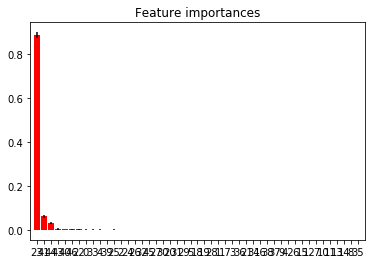

In [129]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(final.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(final.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(final.shape[1]), indices)
plt.xlim([-1, final.shape[1]])
plt.show()

In [130]:
finalimp=df1.drop(["enrollments_jan18",'bid_id',"YearlyMin","YearlyMax",'MOOPFINAL','partdbasicpremium3',
       'partcpremium2', 'partdsupplementalpremium4', 'partdfull', 'partd50',
       'partd25', 'partdtotal5','Cardiovascular_Disorders', 'Chronic_Heart_Failure', 'Dementia',
       'Diabetes_Mellitus', 'End_stge_Renal_Disease_dialysis', 'HIV_AIDS',
       'Chronic_Lung_Disorders', 'Chrnic_Mental_hlth_Cdtn',
       'Crdiovsculr_Disordrs_hrt_fail', 'Chronic_Heart_Fail_Diabetes',
       'Cardio_Disordrs_hrtfail_diabetes'],axis=1)
y=df1['enrollments_jan18']

In [131]:
testimp=df3.drop(['bid_id',"YearlyMin","YearlyMax",'MOOPFINAL','partdbasicpremium3',
       'partcpremium2', 'partdsupplementalpremium4', 'partdfull', 'partd50',
       'partd25', 'partdtotal5','Cardiovascular_Disorders', 'Chronic_Heart_Failure', 'Dementia',
       'Diabetes_Mellitus', 'End_stge_Renal_Disease_dialysis', 'HIV_AIDS',
       'Chronic_Lung_Disorders', 'Chrnic_Mental_hlth_Cdtn',
       'Crdiovsculr_Disordrs_hrt_fail', 'Chronic_Heart_Fail_Diabetes',
       'Cardio_Disordrs_hrtfail_diabetes'],axis=1)

In [132]:
from sklearn.ensemble import RandomForestRegressor
rfcimp=RandomForestRegressor()
rfcimp.fit(finalimp,y) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
predictions_rfc1=rfcimp.predict(testimp)

In [134]:
predictions_rfc1.mean()

405.7765239916719

<h2>Stacknet Regressor</h2>

In [142]:
from pystacknet.pystacknet import StackNetRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [143]:
models=[[KNeighborsRegressor (n_neighbors=300), GradientBoostingRegressor (n_estimators=300),
         ExtraTreesRegressor (n_estimators=300) , DecisionTreeRegressor (),
         AdaBoostRegressor (n_estimators=300)
        ],
        [RandomForestRegressor (n_estimators=400)]
       ]
        

In [144]:
model=StackNetRegressor(models, folds=4,restacking=True, n_jobs=1, verbose=1)

In [145]:
model.fit(final,y)

====================== Start of Level 0 ======================
Input Dimensionality 47 at Level 0 
5 models included in Level 0 
Fold 1/4 , model 0 , rmse===885.252030 
Fold 1/4 , model 1 , rmse===318.854501 
Fold 1/4 , model 2 , rmse===299.127652 
Fold 1/4 , model 3 , rmse===400.658673 
Fold 1/4 , model 4 , rmse===2638.644269 
=========== end of fold 1 in level 0 ===========
Fold 2/4 , model 0 , rmse===925.357630 
Fold 2/4 , model 1 , rmse===545.120336 
Fold 2/4 , model 2 , rmse===495.410024 
Fold 2/4 , model 3 , rmse===680.341757 
Fold 2/4 , model 4 , rmse===675.489298 
=========== end of fold 2 in level 0 ===========
Fold 3/4 , model 0 , rmse===864.775802 
Fold 3/4 , model 1 , rmse===357.034931 
Fold 3/4 , model 2 , rmse===466.217644 
Fold 3/4 , model 3 , rmse===359.360304 
Fold 3/4 , model 4 , rmse===1220.086644 
=========== end of fold 3 in level 0 ===========
Fold 4/4 , model 0 , rmse===1617.600468 
Fold 4/4 , model 1 , rmse===897.709949 
Fold 4/4 , model 2 , rmse===918.676599 
F

In [146]:
predictions_stk=model.predict(test)

====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 


In [147]:
pred_stk=pd.DataFrame(predictions_stk)

<h3> Mape Score Check</h3>

In [135]:
def mean_absolute_percentage_error(y_true, y_pred, sample_weights=None):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert len(y_true) == len(y_pred)
    
    if np.any(y_true==0):
        print("Found zeroes in y_true. MAPE undefined. Removing from set...")
        idx = np.where(y_true==0)
        y_true = np.delete(y_true, idx)
        y_pred = np.delete(y_pred, idx)
        if type(sample_weights) != type(None):
            sample_weights = np.array(sample_weights)
            sample_weights = np.delete(sample_weights, idx)
        
    if type(sample_weights) == type(None):
        return(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
    else:
        sample_weights = np.array(sample_weights)
        assert len(sample_weights) == len(y_true)
        return(100/sum(sample_weights)*np.dot(
                sample_weights, (np.abs((y_true - y_pred) / y_true))
        ))
    
loss_function = mean_absolute_percentage_error

<h1>Submission</h1>

In [148]:
pred_rfc=pd.DataFrame({'State': df2.State, 'County': df2.County, 'bid_id': df2.bid_id,'Organization_Name': df2.Organization_Name,'PredictedEnr':predictions_stk})

Exception: Data must be 1-dimensional

In [138]:
pred_rfc.to_csv('C:/Users/samde/Desktop/Data Science/Datasets/Medicare Hackathon/SameKey.csv', index=False)